<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data classification skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
file_id = '1RZqYls5-2DZH66Y079b7Hy6Sv3qekgkE'
URL = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(URL)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three classification models which should be variations that cover using a simple  classification as a baseline. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your classifications you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classification model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


**Data Source**

[Kaggle](https://www.kaggle.com/c/titanic/data)

**Data Description**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

---

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Data Dictionary**

| Variable  | Definition                        | Key                                  |
|-----------|-----------------------------------|--------------------------------------|
| survival  | Survival                          | 0 = No, 1 = Yes                     |
| pclass    | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex       | Sex                               |                                      |
| age       | Age                               | in years                            |
| sibsp     | # of siblings/spouses aboard     |                                      |
| parch     | # of parents/children aboard     |                                      |
| ticket    | Ticket number                     |                                      |
| fare      | Passenger fare                    |                                      |
| cabin     | Cabin number                      |                                      |
| embarked  | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

---

**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
            - 1st = Upper
            - 2nd = Middle
            - 3rd = Lower
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    sibsp: The dataset defines family relations in this way...
            - Sibling = brother, sister, stepbrother, stepsister
            - Spouse = husband, wife (mistresses and fiancés were ignored)
    parch: The dataset defines family relations in this way...
            - Parent = mother, father
            - Child = daughter, son, stepdaughter, stepson
            - Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note: We could see that there are quite a lot missing values in the Cabin column, so I consider to exclude that column from our observation. Next, the Age column has also missing values, but not as much as the Cabin column, so we could consider imputation on the missing values. Lastly, the Embarked column has only 2 missing values, so we could just drop these rows as it will not be significant to our prediction.

In [5]:
round(data.describe(include='all'), 2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


# 2. Objectives


The main objective of this analysis is to develop a predictive model that accurately determines whether a passenger survived the Titanic disaster. The focus will be on ***prediction***, meaning the goal is to maximize the model's accuracy in classifying survival outcomes rather than interpreting the underlying relationships between variables. The primary metric for evaluation will be ***accuracy***, ensuring that the model correctly predicts survival status for as many passengers as possible.

# 3. Linear Regression Models


## a. Data Cleaning

In [6]:
# Dropping irrelevant features
data_drop = data.drop(columns=['Cabin', 'Name', 'Ticket'])
data_drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
data_drop.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [8]:
# Dropping the missing values in the Embarked column
data_drop = data_drop.dropna(subset=['Embarked'])
data_drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
# Imputation on the Missing Values of Age column with median values
data_imputation = data_drop.copy()
data_imputation['Age'] = data_drop['Age'].fillna(data_drop['Age'].median())
data_imputation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [10]:
round(data_imputation.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.0,889.00,889.00,889.00,889.00,889.00,889.00
mean,446.0,0.38,2.31,29.32,0.52,0.38,32.10
std,257.0,0.49,0.83,12.98,1.10,0.81,49.70
min,1.0,0.00,1.00,0.42,0.00,0.00,0.00
25%,224.0,0.00,2.00,22.00,0.00,0.00,7.90
50%,446.0,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.0,1.00,3.00,35.00,1.00,0.00,31.00
max,891.0,1.00,3.00,80.00,8.00,6.00,512.33


Note: We could see that the mean and standard deviation of the Age features changed respectively from 29.70 and 14.53 to 29.32 and 12.98

In [11]:
data_imputation['Sex'].value_counts(normalize=True)

,proportion
Sex,
male,0.649044
female,0.350956


Note: The data is imbalanced, but not too extreme.

In [12]:
# Binary Encoder
data_encoded = data_imputation.copy()
data_encoded['Sex'] = data_encoded['Sex'].map({'male': 0, 'female': 1})
data_encoded

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,28.0,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [13]:
data_encoded['Embarked'].value_counts(normalize=True)

,proportion
Embarked,
S,0.724409
C,0.188976
Q,0.086614


Note: The data imbalance is extreme in the Embarked feature.

In [14]:
# One-Hot Encoder
data_encoded = pd.get_dummies(data_encoded, columns=['Embarked']).astype(int)
data_encoded

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7,0,0,1
1,2,1,1,1,38,1,0,71,1,0,0
2,3,1,3,1,26,0,0,7,0,0,1
3,4,1,1,1,35,1,0,53,0,0,1
4,5,0,3,0,35,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,0,1
887,888,1,1,1,19,0,0,30,0,0,1
888,889,0,3,1,28,1,2,23,0,0,1
889,890,1,1,0,26,0,0,30,1,0,0


## b. EDA

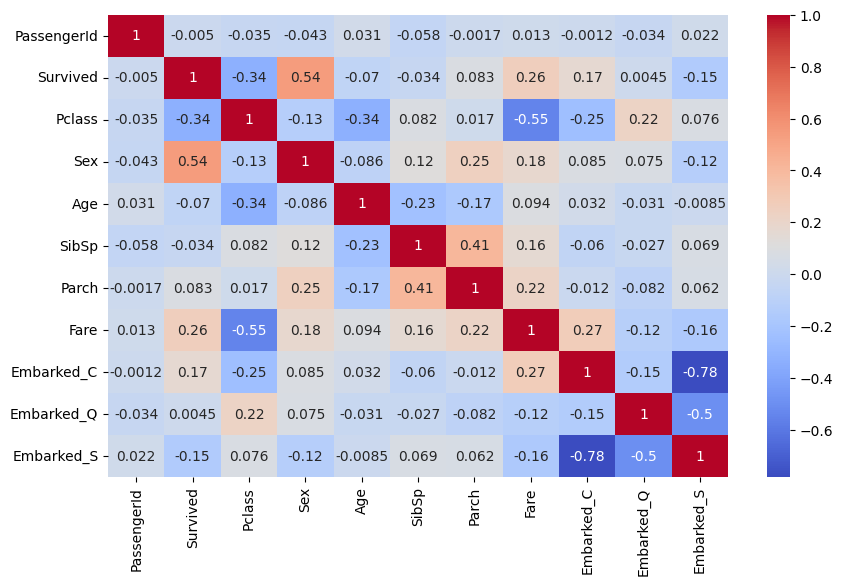

In [16]:
# Visualize the correlation
data_corr = data_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Sort the correlation features with respect to Survived Target Feature
corr_with_target = data_corr['Survived'].abs().sort_values(ascending=False)[1:]
corr_with_target

,Survived
Sex,0.541585
Pclass,0.335549
Fare,0.255447
Embarked_C,0.169966
Embarked_S,0.151777
Parch,0.083151
Age,0.069821
SibSp,0.034040
PassengerId,0.005028
Embarked_Q,0.004536


Note: The top 5 features correlated to target feature are Sex, Pclass, Fare, Embarked_C, Embarked_S

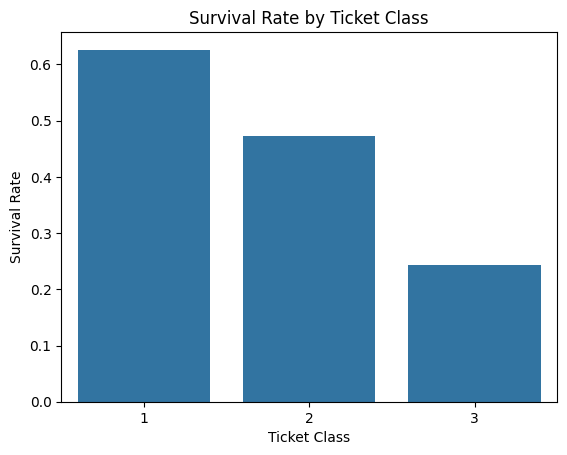

In [18]:
# Survival Rate based by Ticket Class
ticket_survival = data_encoded.groupby('Pclass')['Survived'].mean()
sns.barplot(x=ticket_survival.index, y=ticket_survival.values)
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Ticket Class')
plt.show()

Note: From the barplot above, we could infer that the highest to lowest survival rate by ticket class respectively are 1st class, 2nd class, and 3rd class. But this might be caused by the number of 1st class are higher than 2nd and 3rd class, and so on. Let's check this out.

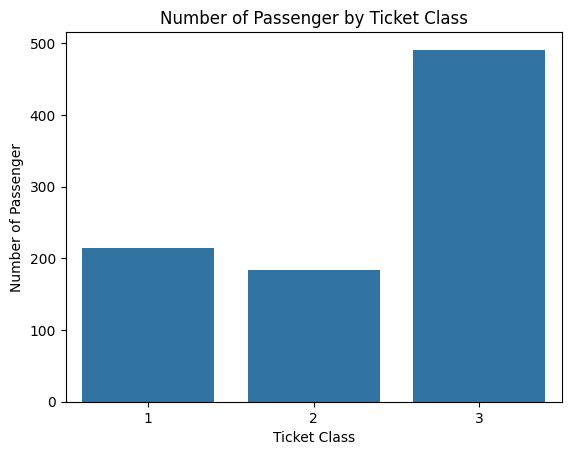

In [19]:
# Number of passenger by ticket class
ticket_passenger = data_encoded['Pclass'].value_counts()
sns.barplot(x=ticket_passenger.index, y=ticket_passenger.values)
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passenger')
plt.title('Number of Passenger by Ticket Class')
plt.show()

Note: We could see that the 3rd class has the most passengers. But, the 2nd class has the least passengers. This confirms that the passenger distribution across ticket classes is uneven, which may influence the survival rates.

We could perform a chi-square test to check for the statistical significance.

In [20]:
# Chi-square test
import scipy.stats as stats

contingency_table = pd.crosstab(data_encoded['Pclass'], data_encoded['Survived'])
print(contingency_table)

Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


In [21]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Significance level
alpha = 0.05

if p < alpha:
    print("There is a significant relationship between ticket class and survival.")
else:
    print("There is no significant relationship between ticket class and survival.")

Chi-square statistic: 100.98040726128336
P-value: 1.1813624785477922e-22
There is a significant relationship between ticket class and survival.


Conclusion: There is a significant relationship between ticket class and survival.

This confirms that passenger class played a crucial role in determining survival rates. First-class passengers had better chances of survival, likely due to better access to lifeboats and priority evacuation, while third-class passengers had lower survival rates, possibly due to delayed access and overcrowding.

Text(0.5, 1.0, 'Survival Rate by Sex')

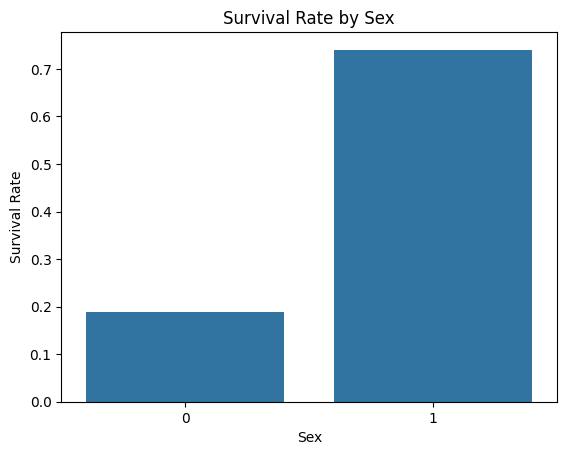

In [22]:
# Survival Rate by Sex
sex_survival = data_encoded.groupby('Sex')['Survived'].mean()
sns.barplot(x=sex_survival.index, y=sex_survival.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

Note: We could see that the survival rate for the women are more than the men. This is quite expected, given the "women and children first" policy followed during the evacuation. Historically, women had a significantly higher chance of survival compared to men. This trend suggests that gender could be a strong predictor in our model.

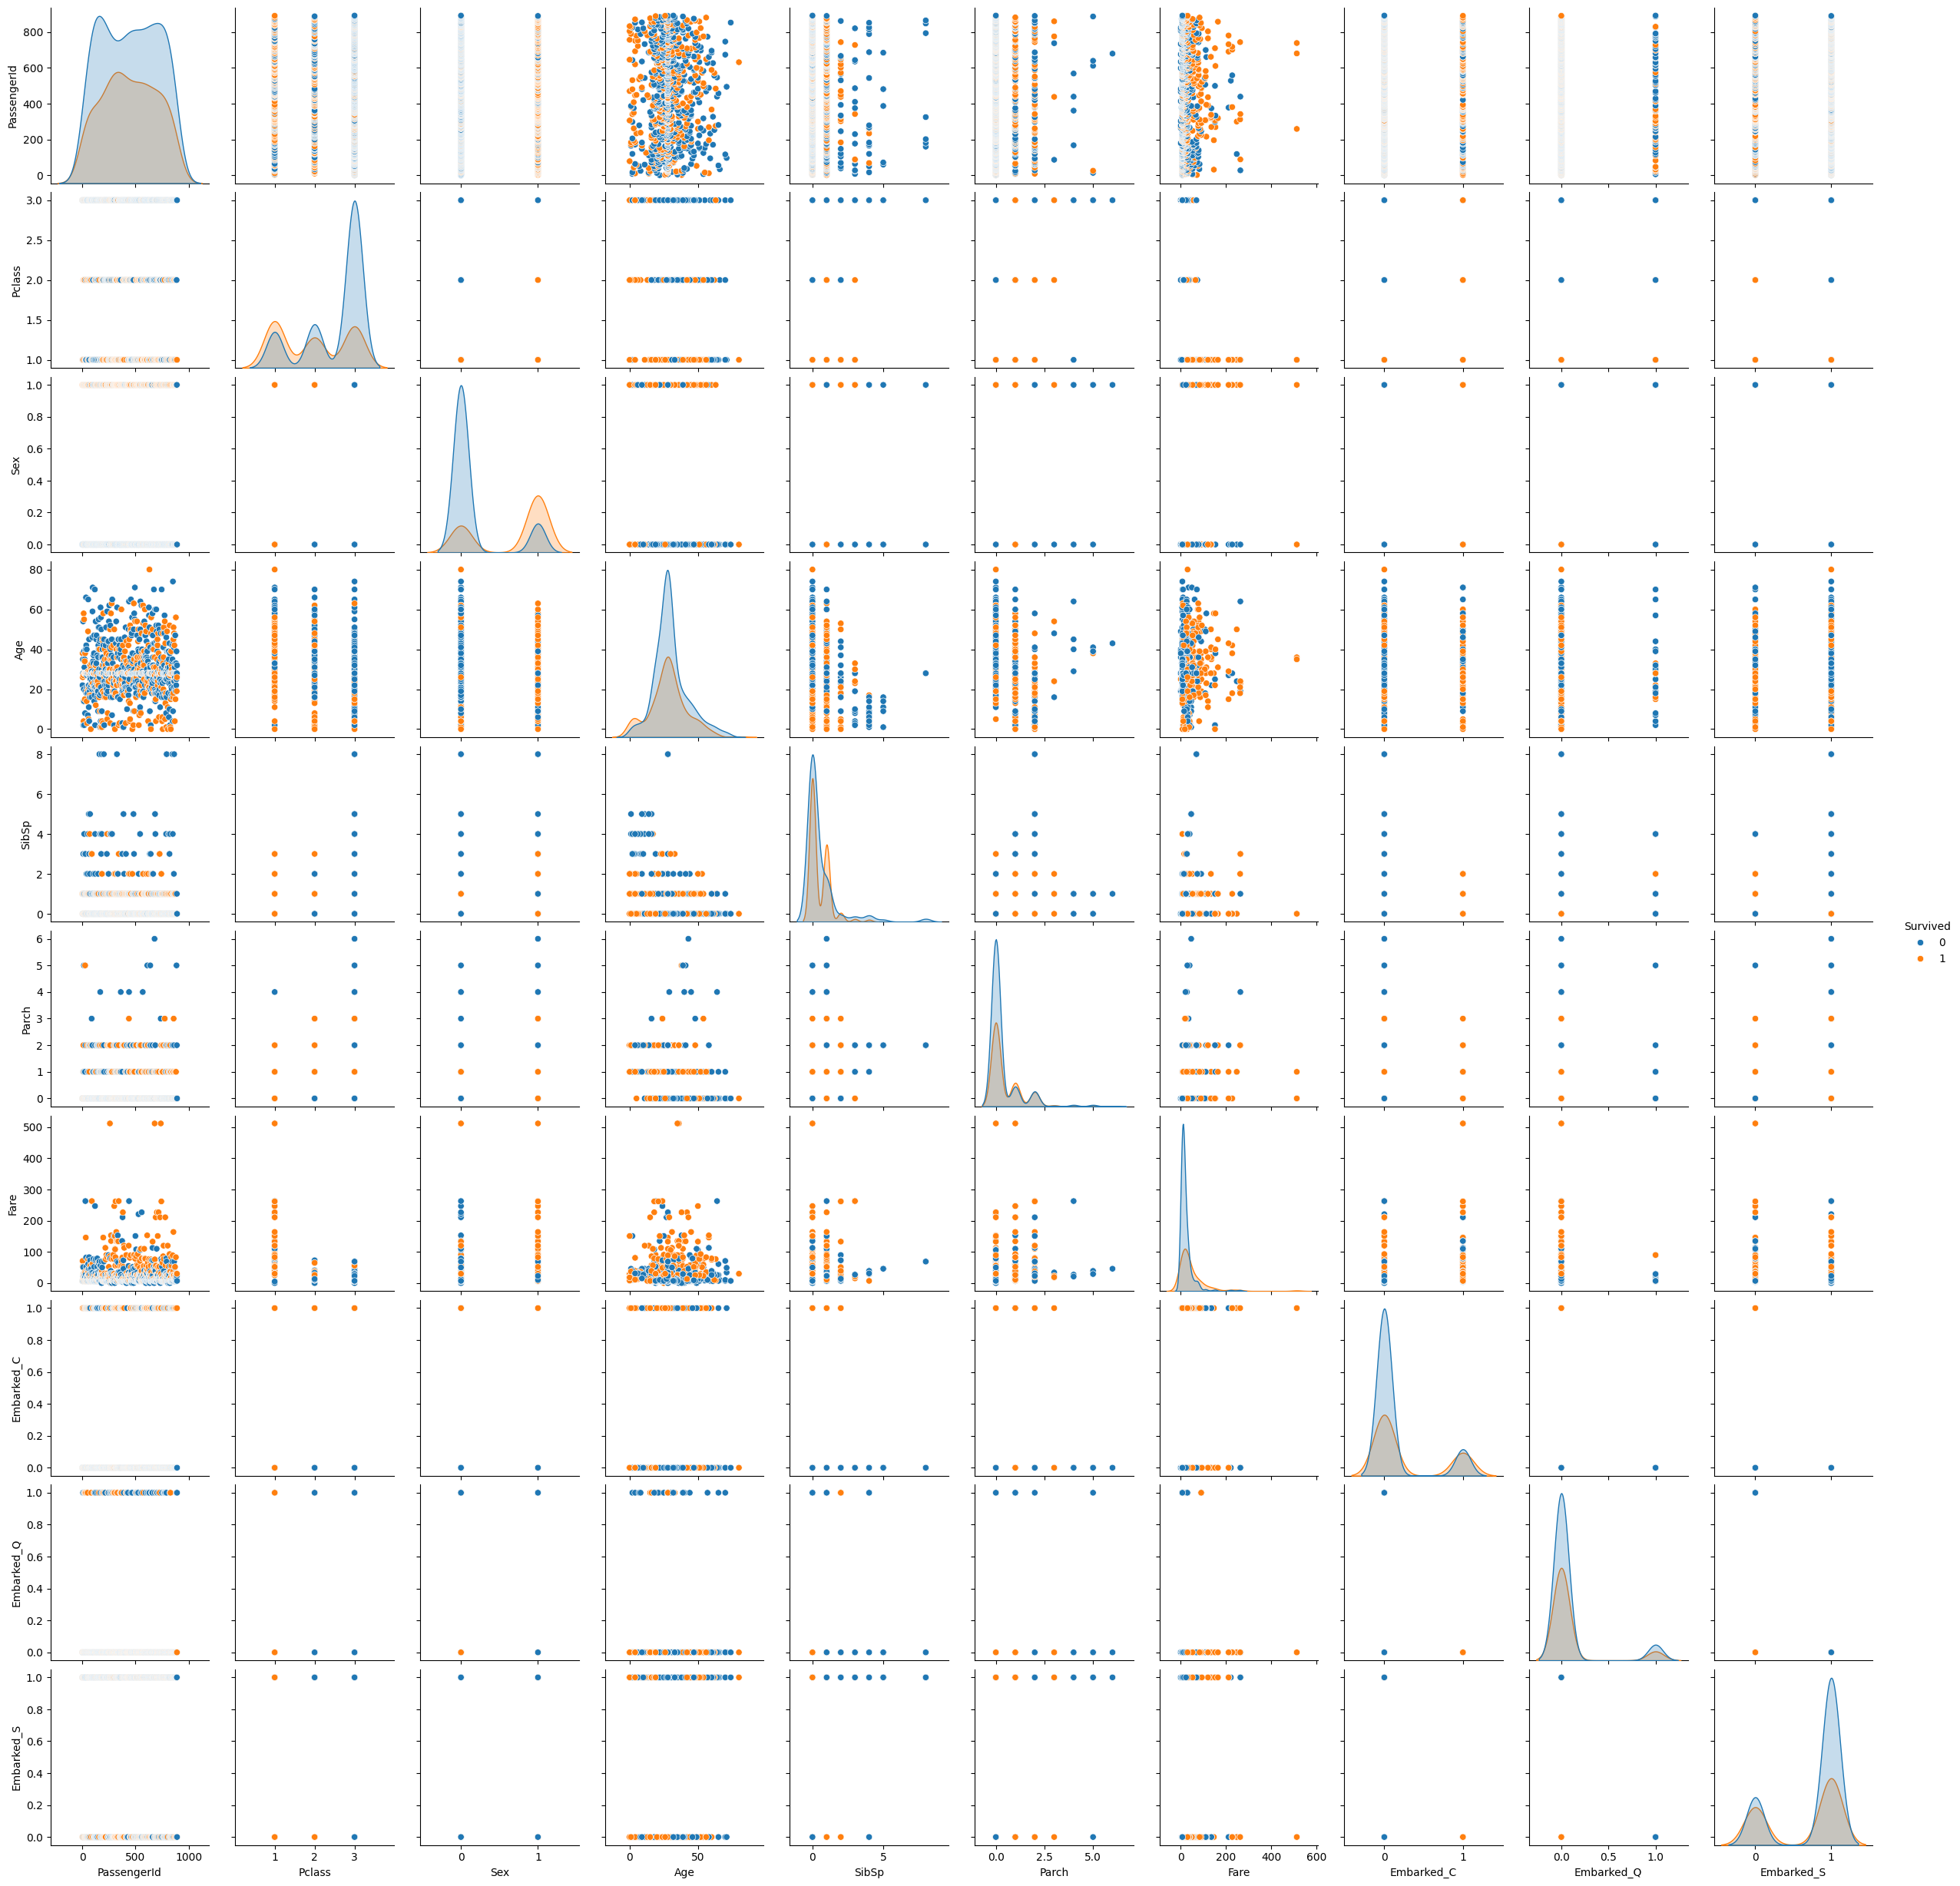

In [23]:
# Visualize the pairplot
sns.pairplot(data_encoded, hue='Survived')
plt.show()

## c. Feature Engineering

In [24]:
data_engineered = data_encoded.copy()

# Create 'Family Size' feature
data_engineered['Family Size'] = data_encoded['SibSp'] + data_encoded['Parch'] + 1

# Create 'IsAlone' feature (1 = Alone, 0 = With family)
data_engineered['IsAlone'] = data_engineered['Family Size'].apply(lambda x: 1 if x == 1 else 0)

data_engineered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family Size,IsAlone
0,1,0,3,0,22,1,0,7,0,0,1,2,0
1,2,1,1,1,38,1,0,71,1,0,0,2,0
2,3,1,3,1,26,0,0,7,0,0,1,1,1
3,4,1,1,1,35,1,0,53,0,0,1,2,0
4,5,0,3,0,35,0,0,8,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,0,1,1,1
887,888,1,1,1,19,0,0,30,0,0,1,1,1
888,889,0,3,1,28,1,2,23,0,0,1,4,0
889,890,1,1,0,26,0,0,30,1,0,0,1,1


In [25]:
# Convert Age into categories
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elderly']
data_engineered['Age Group'] = pd.cut(data_engineered['Age'], bins=bins, labels=labels, include_lowest=True)
data_engineered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family Size,IsAlone,Age Group
0,1,0,3,0,22,1,0,7,0,0,1,2,0,Adult
1,2,1,1,1,38,1,0,71,1,0,0,2,0,Senior
2,3,1,3,1,26,0,0,7,0,0,1,1,1,Adult
3,4,1,1,1,35,1,0,53,0,0,1,2,0,Adult
4,5,0,3,0,35,0,0,8,0,0,1,1,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,0,1,1,1,Adult
887,888,1,1,1,19,0,0,30,0,0,1,1,1,Adult
888,889,0,3,1,28,1,2,23,0,0,1,4,0,Adult
889,890,1,1,0,26,0,0,30,1,0,0,1,1,Adult


<ipython-input-26-e92760b1b1f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = data_engineered.groupby('Age Group')['Survived'].mean()


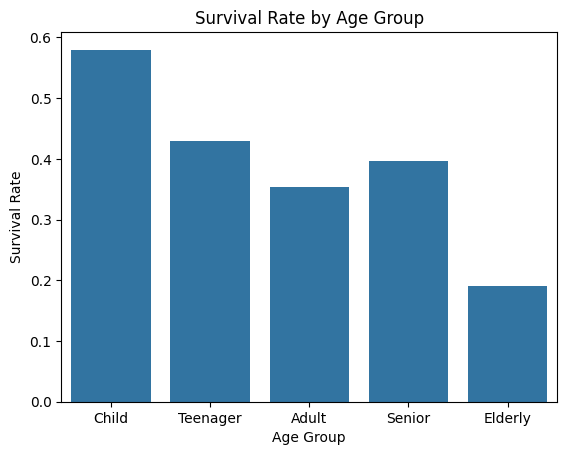

In [26]:
# Survival Rate by Age Group
age_survival = data_engineered.groupby('Age Group')['Survived'].mean()
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

In [27]:
# Apply Label Encoding to Age Group
label_mapping = {'Child': 0, 'Teenager': 1, 'Adult': 2, 'Senior': 3, 'Elderly': 4}
data_engineered['Age Group'] = data_engineered['Age Group'].map(label_mapping)
data_engineered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Family Size,IsAlone,Age Group
0,1,0,3,0,22,1,0,7,0,0,1,2,0,2
1,2,1,1,1,38,1,0,71,1,0,0,2,0,3
2,3,1,3,1,26,0,0,7,0,0,1,1,1,2
3,4,1,1,1,35,1,0,53,0,0,1,2,0,2
4,5,0,3,0,35,0,0,8,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,0,1,1,1,2
887,888,1,1,1,19,0,0,30,0,0,1,1,1,2
888,889,0,3,1,28,1,2,23,0,0,1,4,0,2
889,890,1,1,0,26,0,0,30,1,0,0,1,1,2


In [168]:
# Check for the correlation once again
corr_with_target = data_engineered.corr()['Survived'].sort_values(ascending=False)[1:]
corr_with_target

,Survived
Sex,0.541585
Fare,0.255447
Embarked_C,0.169966
Parch,0.083151
Family Size,0.018277
Embarked_Q,0.004536
PassengerId,-0.005028
SibSp,-0.034040
Age,-0.069821
Age Group,-0.098722


We could see that the 'IsAlone' feature after feature engineering has better correlation than 'Parch' and 'SibSp' feature. But, the 'Age Group' and 'Family Size' have weak correlation, so they might not be useful for the model training.

## d. Data Splitting

In [76]:
X = data_engineered[['Sex', 'Pclass', 'Fare', 'IsAlone', 'Embarked_C', 'Embarked_S']]
y = data_engineered['Survived']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((711, 6), (178, 6))

## e. Data Scaling

In [117]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train) # Because the encoded feature only has value of 0 and 1, so it's okay to include them here.
X_test_s = s.transform(X_test)

## f. Model Training

### 1) Logistic Regression

In [145]:
def classification_report_highlighted(y_true, y_pred):
    """
    Prints a classification report with recall highlighted,
    as recall is the main objective.

    Args:
        y_true (array-like): True labels
        y_pred (array-like): Predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')  # Change to 'macro' for multi-class
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    print("=" * 40)
    print("🔹 Classification Report")
    print("=" * 40)
    print(f"🚨 Accuracy   : \033[1m{accuracy:.4f}\033[0m  (Main Objective!)") # Highlight accuracy
    print(f"✅ Precision  : {precision:.4f}")
    print(f"✅ Recall     : {recall:.4f}")
    print(f"✅ F1 Score   : {f1:.4f}")
    print("=" * 40)

    # Print the full classification report
    print("\n🔹 Detailed Report:")
    print(classification_report(y_true, y_pred))

In [146]:
lr = LogisticRegression(solver='liblinear').fit(X_train_s, y_train)
yhat = lr.predict(X_test_s)

In [147]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.7865  (Main Objective!)
✅ Precision  : 0.7206
✅ Recall     : 0.7206
✅ F1 Score   : 0.7206

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.72      0.72      0.72        68

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



### 2) KNN

In [148]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store recall for each k
accuracy_scores = []
f1_scores = []

for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn = knn.fit(X_train_s, y_train.values.ravel())
    preds = knn.predict(X_test_s)

    # Evaluate the classifier with recall and f1score
    accuracy = accuracy_score(preds, y_test)
    accuracy_scores.append((k, round(accuracy_score(y_test, preds), 4)))

    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))

# Convert the accuracy and f1 list to a dataframe
accuracy_results = pd.DataFrame(accuracy_scores, columns=['K', 'Accuracy Score'])
accuracy_results.set_index('K')

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.6389
2,0.6355
3,0.6970
4,0.6949
5,0.6885
6,0.6496
7,0.6557
8,0.6271
9,0.6271


In [149]:
accuracy_results.index.name = None
f1_results.index.name = None

Text(0.5, 1.0, 'KNN Accuracy Score')

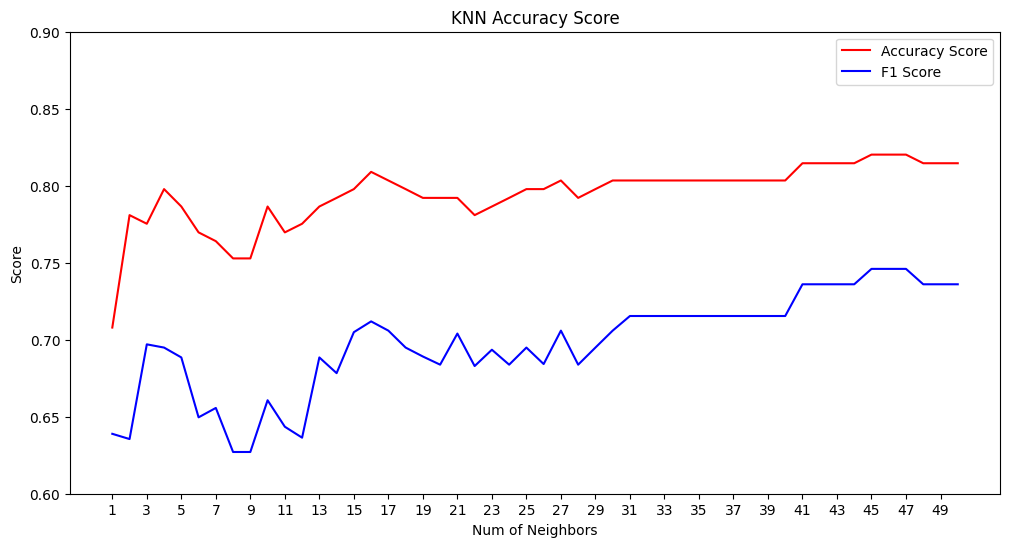

In [151]:
# Plot accuracy results
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=accuracy_results, x='K', y='Accuracy Score', c='red', label='Accuracy Score')
# Plot F1 results
sns.lineplot(data=f1_results, x='K', y='F1 Score', ax=ax1, c='blue', label='F1 Score')

ax1.set(xlabel='Num of Neighbors', ylabel='Score')
ax1.set_xticks(range(1, max_k, 2));
plt.ylim((0.6, 0.90))
ax1.legend()
plt.title('KNN Accuracy Score')

In [152]:
knn_7 = KNeighborsClassifier(n_neighbors=45).fit(X_train_s, y_train.values.ravel())
yhat_knn = knn_7.predict(X_test_s)
classification_report_highlighted(y_test, yhat_knn)

🔹 Classification Report
🚨 Accuracy   : 0.8202  (Main Objective!)
✅ Precision  : 0.8103
✅ Recall     : 0.6912
✅ F1 Score   : 0.7460

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.69      0.75        68

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



### 3) DT

In [164]:
dt = DecisionTreeClassifier(random_state=42)

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(estimator = dt,
                        param_grid = params_grid,
                        scoring='accuracy',
                        cv = 5, verbose = 1)

grid_search.fit(X_train_s, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2}

In [165]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2, random_state=42)
dt.fit(X_train, y_train.values.ravel())
yhat2 = dt.predict(X_test)
classification_report_highlighted(y_test, yhat2)

🔹 Classification Report
🚨 Accuracy   : 0.7640  (Main Objective!)
✅ Precision  : 0.7407
✅ Recall     : 0.5882
✅ F1 Score   : 0.6557

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.74      0.59      0.66        68

    accuracy                           0.76       178
   macro avg       0.76      0.73      0.74       178
weighted avg       0.76      0.76      0.76       178



### 4) RF

In [161]:
RF = RandomForestClassifier()

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth': [2*n+1 for n in range(10)],
             'max_features': ["auto", "sqrt", "log2"]}

search = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='accuracy')
search.fit(X_train_s, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [162]:
search.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 35}

In [163]:
yhat3 = search.predict(X_test)
classification_report_highlighted(y_test, yhat3)

🔹 Classification Report
🚨 Accuracy   : 0.7697  (Main Objective!)
✅ Precision  : 0.7288
✅ Recall     : 0.6324
✅ F1 Score   : 0.6772

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.63      0.68        68

    accuracy                           0.77       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.77      0.77      0.77       178



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [167]:
from sklearn.metrics import roc_auc_score

model_list = [lr, knn_7, dt, search]
model_label = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

# Create a summary evaluation result
metrics = []
for lab, mod in zip(model_label, model_list):
  y_pred = mod.predict(X_test_s)  # Predictions
  y_prob = mod.predict_proba(X_test_s)[:, 1]  # Probabilities (for AUC)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')  # 🔥 Focus on Recall
  f1 = f1_score(y_test, y_pred, average='weighted')
  auc = roc_auc_score(y_test, y_prob) if hasattr(mod, "predict_proba") else None  # AUC only if supported

  metrics.append(pd.Series({
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      'AUC': auc
  }, name=lab))

# Convert list to DataFrame
metrics_df = pd.concat(metrics, axis=1)
metrics_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,Logistic Regression,KNN,Decision Tree,Random Forest
Accuracy,0.786517,0.820225,0.747191,0.786517
Precision,0.786517,0.819401,0.743164,0.785530
Recall,0.786517,0.820225,0.747191,0.786517
F1 Score,0.786517,0.816999,0.740884,0.780654
AUC,0.824599,0.809091,0.744385,0.797259


# 4. Insights and key findings


Based on the evaluation metrics, **K-Nearest Neighbors (KNN)** emerges as the best-performing model. It achieved **the highest accuracy** (82.02%), precision (81.94%), and recall (82.02%), making it a strong choice for predicting survival. Additionally, its F1-score (81.70%) and AUC (80.91%) are competitive, indicating that it balances precision and recall effectively.

However, KNN can sometimes be less explainable compared to simpler models like Logistic Regression, which provides clear insights into feature importance. But, because prediction is the main objective, we still choose KNN as our choice.

**Key Findings & Insights**

**1. Survival Patterns**

- Women had a higher survival rate than men, aligning with the "women and children first" evacuation strategy.

- First-class passengers had the highest survival rates, followed by second-class, with third-class passengers having the lowest chances.

**2. Feature Importance**

- Sex (0.5416) → The strongest predictor, confirming that women had a significantly higher survival rate than men.

- Fare (0.2554) → Passengers who paid higher fares had better survival odds, likely because wealthier individuals had access to better cabins and lifeboats.

- Embarked_C (0.1699) → Passengers from Cherbourg had higher survival rates, possibly because more first-class passengers boarded there.

- Embarked_S (-0.1518) → Passengers from Southampton had lower survival rates, likely due to a higher proportion of third-class passengers.

- IsAlone (-0.2062) → Traveling alone significantly reduced survival chances, reinforcing the idea that families with children and women are prioritized.

- Pclass (-0.3355) → Third-class passengers were the least likely to survive, confirming a strong negative correlation between lower ticket class and survival.

**3. Model Performance**

- KNN provided the best predictive power but at the cost of being less interpretable.

- Logistic Regression, while slightly less accurate, remains valuable for explaining feature importance.

- Decision Trees had the weakest performance, likely due to overfitting on the training data.

# 5. Next Steps


**Suggestions for Next Steps in Analyzing the Data:**

**1. Feature Engineering for Better Prediction**

- Family Grouping → Combine SibSp and Parch into a new "Family Category" (e.g., Alone, Small Family, Large Family) to better reflect survival chances.

- Fare Binning → Categorize fare into ranges (Low, Medium, High) to check if wealth-based survival trends are clearer.

**2. Exploring Interaction Effects**

- Sex & Pclass Interaction → Does being female still guarantee higher survival in third class?

- IsAlone & Pclass → Did third-class solo travelers have a significantly worse survival rate than first-class solo travelers?

**3. Trying Alternative Models**

- Ensemble Methods (XGBoost) → To capture non-linear relationships.

- Hyperparameter Tuning → Optimize logistic regression and KNN for better result.

**4. Revisiting the Model After Adding Features**

- Evaluate whether new features (like family group size, age bins, and fare categories) improve performance.

- Compare the updated model with the current one to check if recall and accuracy increase.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
